In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans
from sklearn.metrics import pairwise_distances
sns.set(style="whitegrid")

In [6]:
import DataProvider
import Visualizer
from Clusterer import Clusterer
from local_adapter.LocalFileDataLoader import LocalFileDataLoader

In [7]:
teams_27="test-data/27_teams.json"

data = DataProvider.DataProvider(data_loader=LocalFileDataLoader(teams_27))
dist_matrix = data.get_distance_matrix()
clusterer = Clusterer(data)

dist_percentiles = data.get_distance_percentiles()
print(dist_percentiles)

{50: np.float64(4209.446901884323), 70: np.float64(6428.334001638582), 75: np.float64(7024.032049357527), 80: np.float64(7412.4480552688265), 90: np.float64(9279.532467605564), 95: np.float64(10527.74727331306), 99: np.float64(12186.413525534079)}


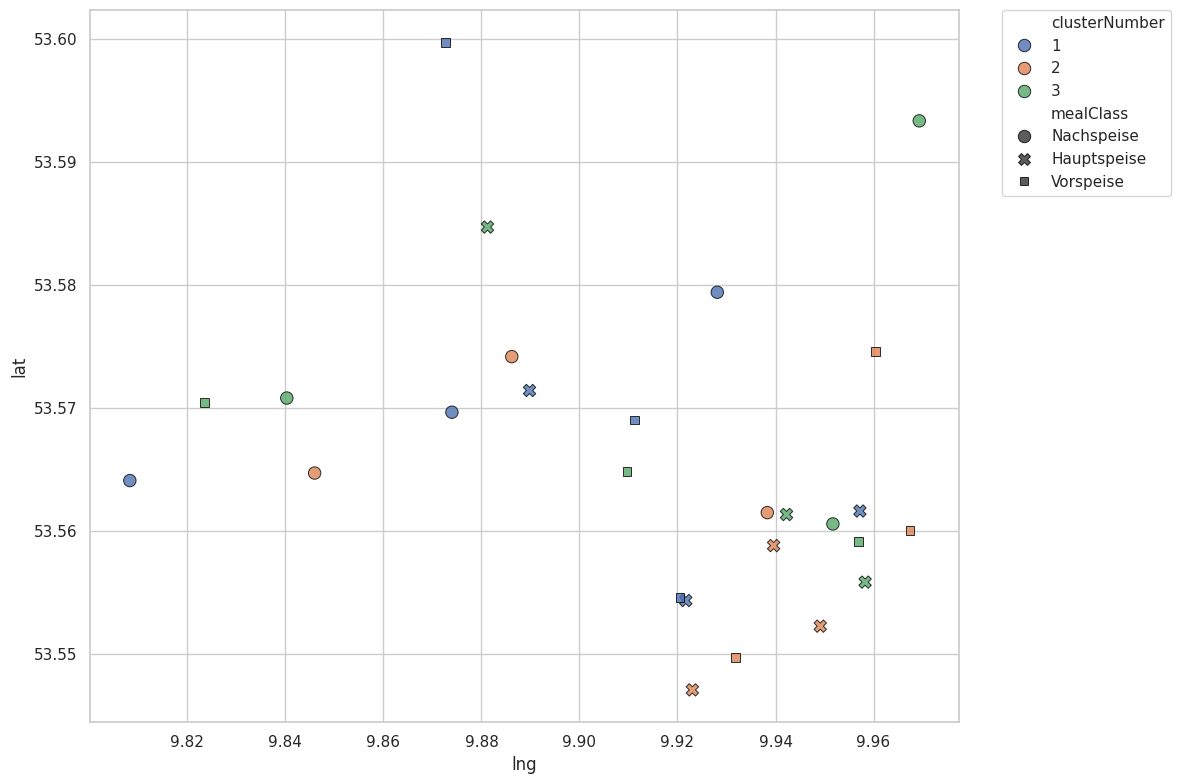

Cluster 1: 9 Elemente, maximale Distanz: 11956.38
Cluster 2: 9 Elemente, maximale Distanz: 9675.67
Cluster 3: 9 Elemente, maximale Distanz: 12337.82


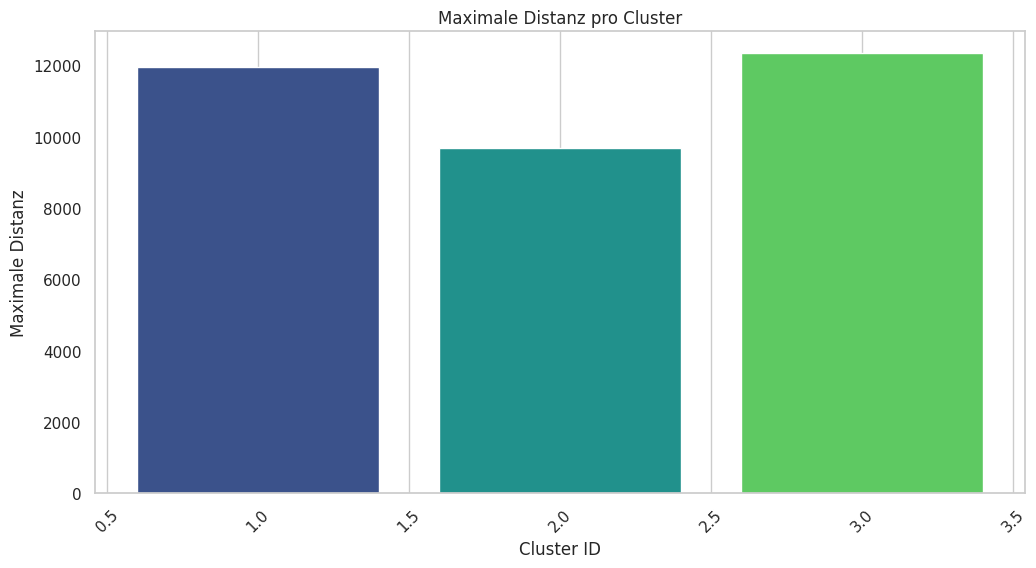

In [8]:
vis = Visualizer.Visualizer(data)
vis.plot_geocodes(data.get_routes())
vis.plot_max_distances_per_cluster(clusterer.print_max_distances_per_cluster())

In [9]:
routes, labels = clusterer.predict()
print (labels)

{"level":"INFO","location":"predict:117","message":"Cluster 0:","timestamp":"2025-08-06 20:49:53,532+0200","service":"route-optimization","taskName":"Task-3"}
{"level":"INFO","location":"predict:118","message":"Current meal classes: Counter({'Nachspeise': 5, 'Hauptspeise': 2, 'Vorspeise': 2})","timestamp":"2025-08-06 20:49:53,534+0200","service":"route-optimization","taskName":"Task-3"}
{"level":"INFO","location":"predict:119","message":"Required meal classes: Counter({'Vorspeise': 3, 'Hauptspeise': 3, 'Nachspeise': 3})","timestamp":"2025-08-06 20:49:53,535+0200","service":"route-optimization","taskName":"Task-3"}
{"level":"INFO","location":"predict:124","message":"Cluster 0: Nachspeise excess: 2","timestamp":"2025-08-06 20:49:53,535+0200","service":"route-optimization","taskName":"Task-3"}
{"level":"INFO","location":"predict:127","message":"Removing indices [0, 13] from cluster 0","timestamp":"2025-08-06 20:49:53,536+0200","service":"route-optimization","taskName":"Task-3"}
{"level":"

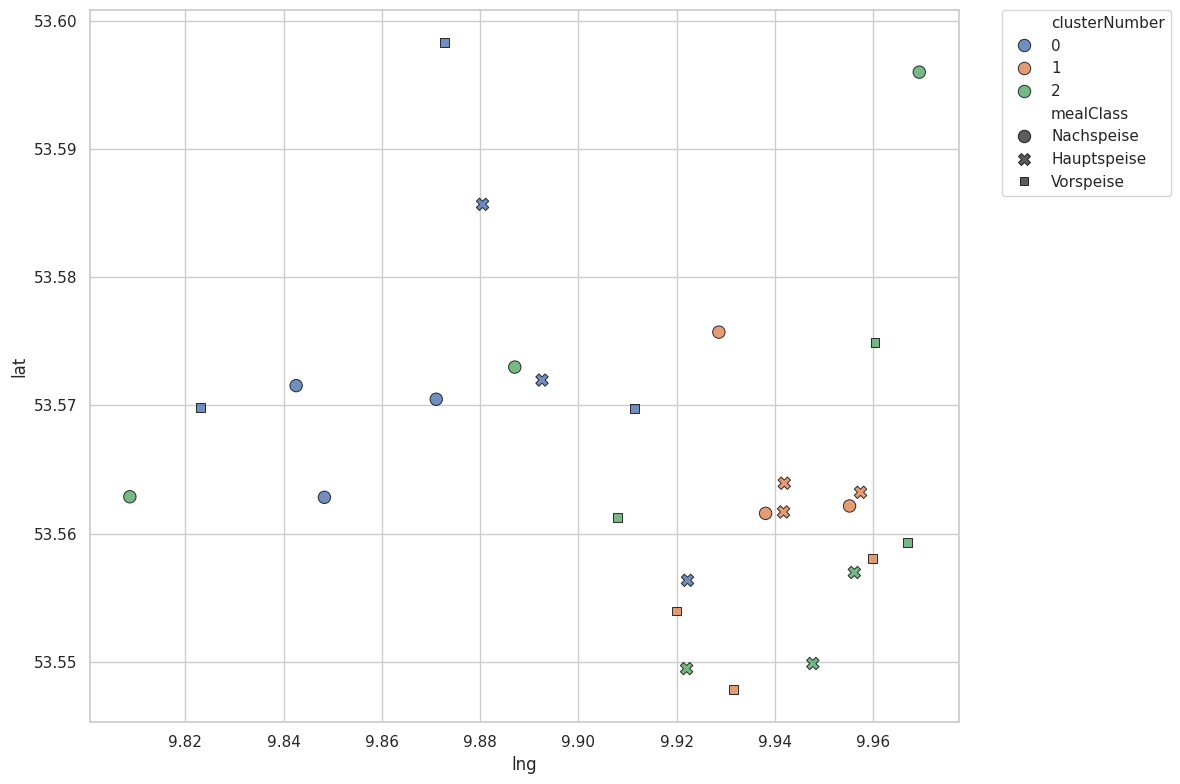

Cluster 0: 9 Elemente, maximale Distanz: 8194.02
Cluster 1: 9 Elemente, maximale Distanz: 4123.03
Cluster 2: 9 Elemente, maximale Distanz: 13614.43


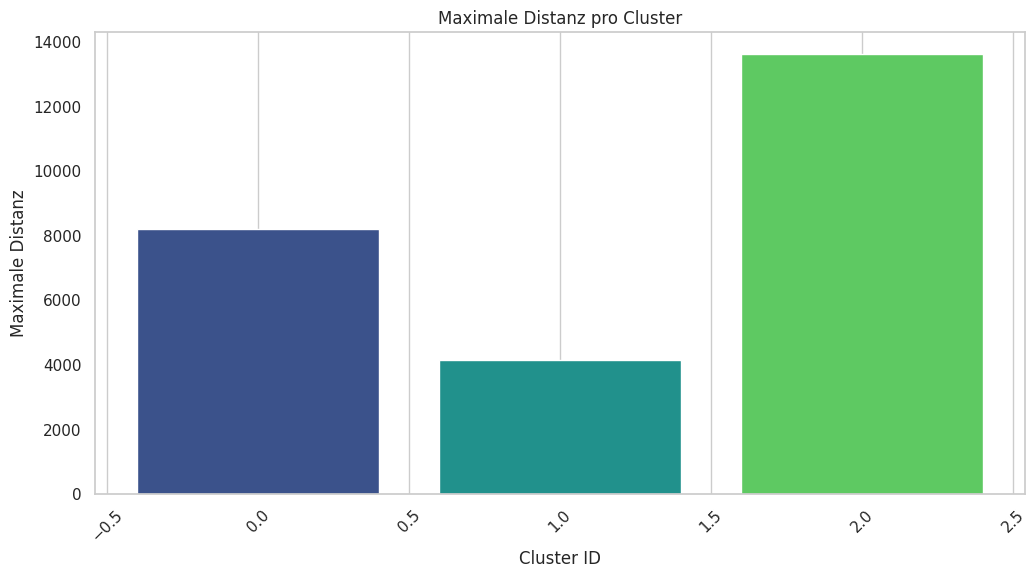

In [10]:
vis.plot_geocodes(routes)
vis.plot_max_distances_per_cluster(clusterer.print_max_distances_per_cluster())

In [11]:
route_cluster_0 = [route for route in routes if route.clusterNumber == 0] 
route_cluster_0

[Team(3, Hauptspeise),
 Team(4, Hauptspeise),
 Team(6, Vorspeise),
 Team(7, Nachspeise),
 Team(8, Nachspeise),
 Team(12, Vorspeise),
 Team(18, Nachspeise),
 Team(25, Vorspeise),
 Team(27, Hauptspeise)]

In [12]:
import RouteBuilder
route_builder = RouteBuilder.RouteBuilder(data, routes)
routes_cluster_0 = route_builder.build_route_for_cluster_label(0)

{"level":"INFO","location":"build_route_for_cluster_label:49","message":"Building route for cluster label 0 with size 9 and matrix: [[[1, 4, 7], [2, 5, 8], [3, 6, 9]], [[4, 2, 9], [5, 3, 7], [6, 1, 8]], [[7, 2, 6], [8, 3, 4], [9, 1, 5]]]","timestamp":"2025-08-06 20:50:36,262+0200","service":"route-optimization","taskName":"Task-3"}
{"level":"INFO","location":"_find_optimal_assignment:80","message":"Testing 3 x 6 meal class permutations","timestamp":"2025-08-06 20:50:36,263+0200","service":"route-optimization","taskName":"Task-3"}
{1: Team(6, Vorspeise), 2: Team(12, Vorspeise), 3: Team(25, Vorspeise), 4: Team(4, Hauptspeise), 5: Team(27, Hauptspeise), 6: Team(3, Hauptspeise), 7: Team(7, Nachspeise), 8: Team(18, Nachspeise), 9: Team(8, Nachspeise)}
{"level":"INFO","location":"build_route_for_cluster_label:49","message":"Building route for cluster label 0 with size 9 and matrix: [[[1, 4, 5], [2, 6, 8], [3, 7, 9]], [[4, 2, 9], [5, 7, 8], [6, 1, 3]], [[7, 1, 2], [8, 3, 4], [9, 5, 6]]]","tim

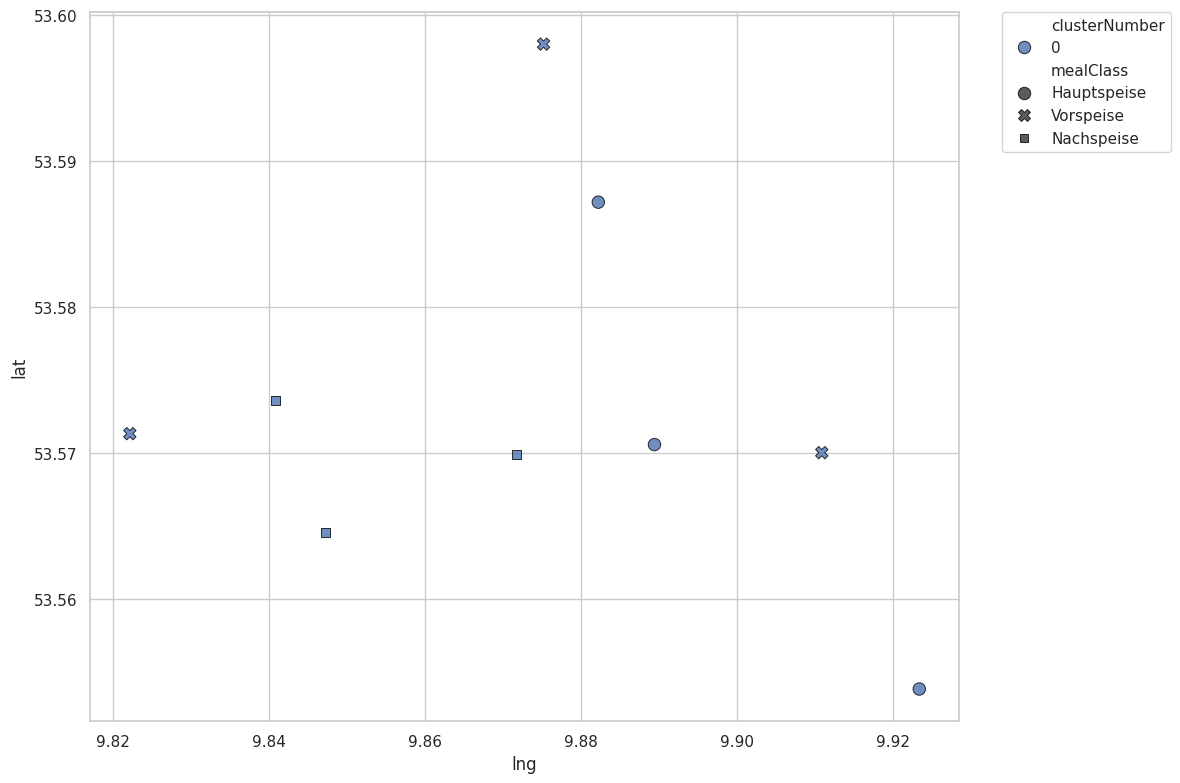

In [13]:
vis.plot_geocodes(route_cluster_0)